In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('./dataset/train.csv', index_col=0)
print('Train data shape:', train.shape)

Train data shape: (891, 11)


In [3]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [5]:
Categorical = ['Survived', 'Sex', 'Pclass', 'SibSp', 'Parch', 'Embarked']
Real_valued = ['Age', 'Fare']

Uncat = ['Name', 'Ticket', 'Cabin']

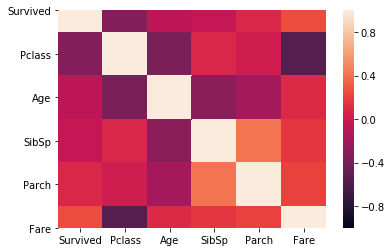

In [6]:
sns.heatmap(train.corr(), vmin=-1, vmax=1, )
plt.show()

# Categorical 

## Target

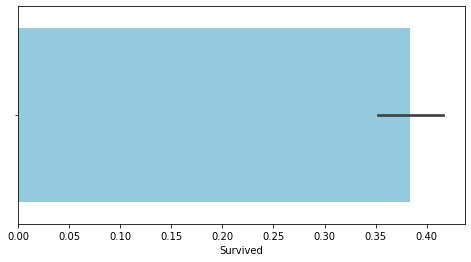

In [7]:
plt.figure(figsize=(8,4))
sns.barplot(data=train, x='Survived', color='skyblue')

## Features

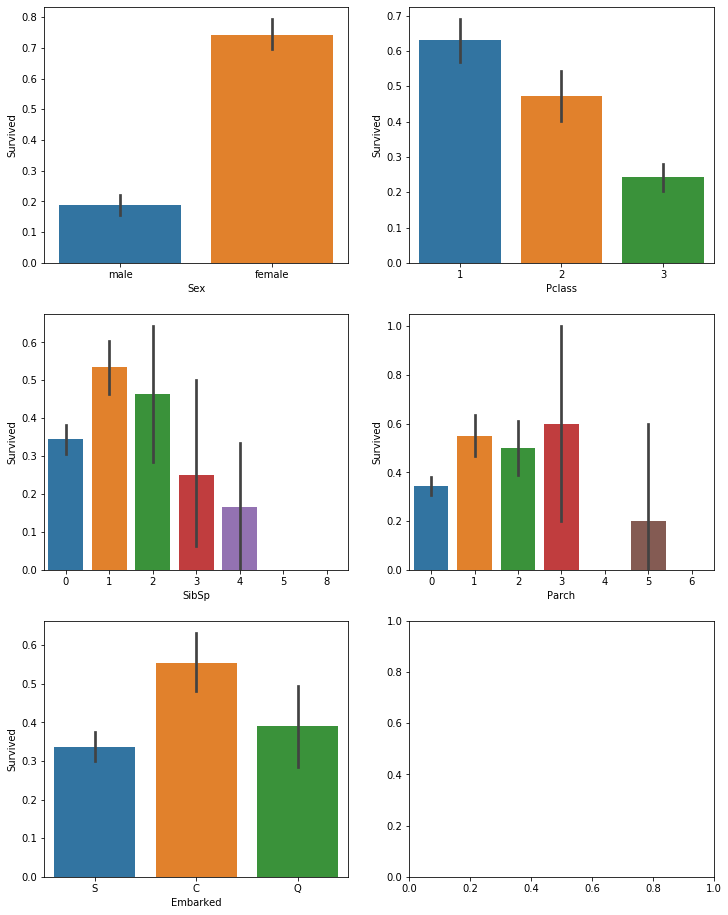

In [8]:
fig, axs = plt.subplots(3, 2, figsize=(12,16))
for ax, cat in zip(axs.flatten(), Categorical[1:]):
    sns.barplot(data=train, x=cat, y='Survived', ax=ax)

# Real Valued

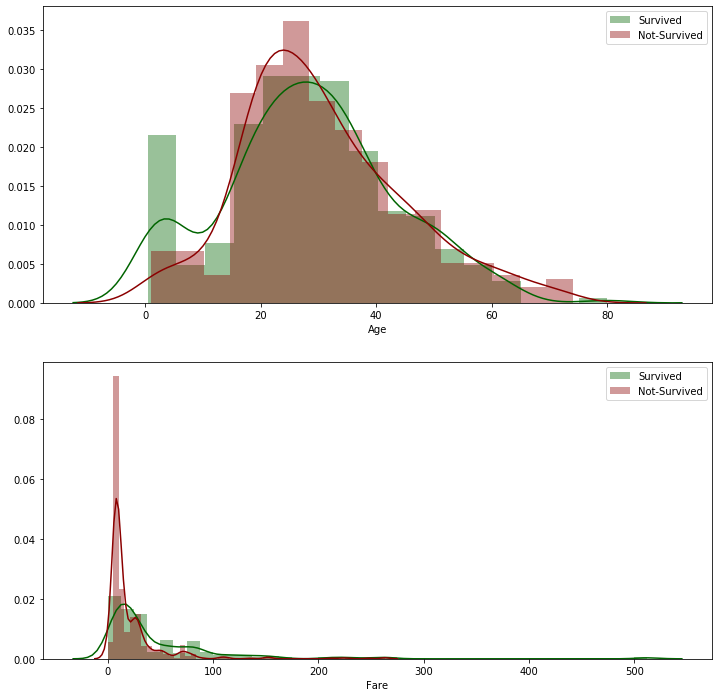

In [9]:
fig, axs = plt.subplots(2, 1, figsize=(12,12))

for ax, var in zip(axs, Real_valued):
    sns.distplot(train[train.Survived == 1][var].dropna(), color='darkgreen', ax=ax, label='Survived')
    sns.distplot(train[train.Survived == 0][var].dropna(), color='darkred', ax=ax, label='Not-Survived')
    ax.legend()

# Feature Engineering

## Passenger Name

In [10]:
train.Name.head()

PassengerId
1                              Braund, Mr. Owen Harris
2    Cumings, Mrs. John Bradley (Florence Briggs Th...
3                               Heikkinen, Miss. Laina
4         Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                             Allen, Mr. William Henry
Name: Name, dtype: object

In [11]:
train['Name'] = train.Name.map(lambda x:re.findall('([A-Za-z]+\.)' ,x)[0])

In [12]:
train.Name.head()

PassengerId
1      Mr.
2     Mrs.
3    Miss.
4     Mrs.
5      Mr.
Name: Name, dtype: object

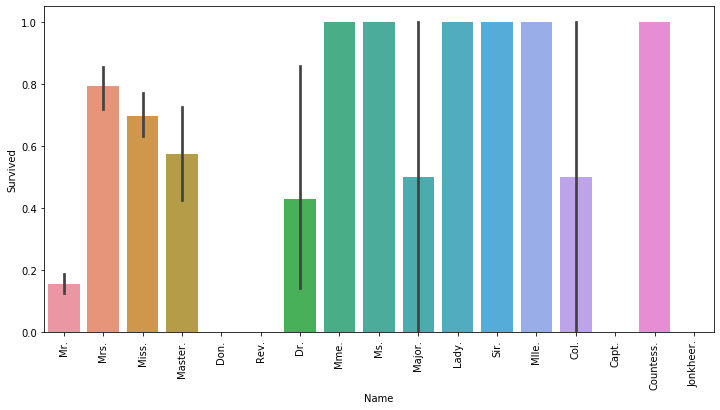

In [13]:
plt.figure(figsize=(12,6))
sns.barplot(x=train.Name, y=train.Survived)
plt.xticks(rotation='vertical')
plt.show()

In [14]:
title, count = np.unique(train.Name.values, return_counts=True)
pd.DataFrame({'title':title, 'count':count}).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
title,Capt.,Col.,Countess.,Don.,Dr.,Jonkheer.,Lady.,Major.,Master.,Miss.,Mlle.,Mme.,Mr.,Mrs.,Ms.,Rev.,Sir.
count,1,2,1,1,7,1,1,2,40,182,2,1,517,125,1,6,1


In [15]:
def group_titles(titles):
    for i, each in enumerate(titles):
        if  any(each == ele for ele in ['Mr.', 'Miss.', 'Mrs.', 'Master.']):
            continue
        elif  any(each == ele for ele in ['Sir.', 'Ms.', 'Mme.', 'Mlle.', 'Lady.', 'Countess.']):
            titles[i] = 'grp1'
        else:
            titles[i] = 'grp2'

In [16]:
group_titles(train.Name.values)

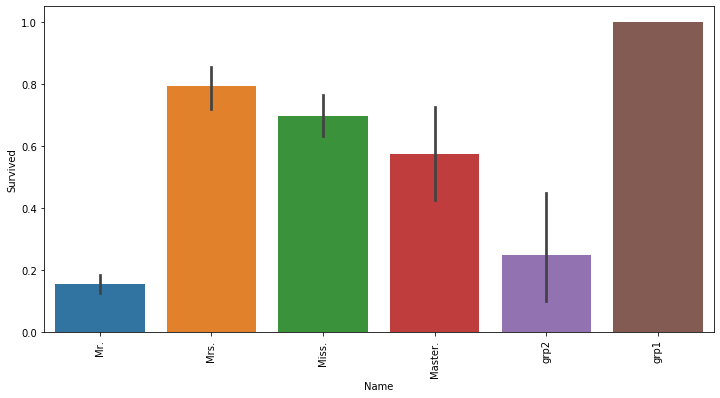

In [17]:
plt.figure(figsize=(12,6))
sns.barplot(x=train.Name, y=train.Survived)
plt.xticks(rotation='vertical')
plt.show()